In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB

In [4]:
train = pd.read_csv('train_std.csv')
test = pd.read_csv('test_std.csv')

In [5]:
cat_columns =train.select_dtypes(include=[object]).columns
cont_columns = train.select_dtypes(include=[np.number]).columns

In [6]:
cat_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [7]:
cont_columns

Index(['Unnamed: 0', 'age', 'fnlwgt', 'educational-num', 'hours-per-week',
       'income'],
      dtype='object')

In [8]:
for i in cat_columns : 
  train[i] = train[i].replace('?',np.nan)
  test[i] = test[i].replace('?',np.nan)

In [9]:
train = train.fillna(train.mode().iloc[0])
test = test.fillna(test.mode().iloc[0])

In [10]:
train = train.drop(columns = ['Unnamed: 0'])

In [11]:
test = test.drop(columns = ['Unnamed: 0'])

In [12]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,-1.274326,Private,1.971346,Some-college,-0.232156,Never-married,Adm-clerical,Not-in-family,White,Female,-0.163839,United-States,0.0
1,0.188520,Private,-1.582668,Some-college,-0.232156,Married-civ-spouse,Prof-specialty,Husband,White,Male,-0.163839,United-States,1.0
2,0.419495,Federal-gov,-0.470112,Some-college,-0.232156,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.494211,United-States,1.0
3,1.574374,Private,-1.131500,HS-grad,-0.614396,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.163839,United-States,1.0
4,-0.581399,Private,0.677980,Some-college,-0.232156,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.081583,United-States,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16356,0.034536,Private,1.096842,Assoc-voc,0.150083,Married-civ-spouse,Craft-repair,Husband,White,Male,0.247443,United-States,1.0
16357,1.112422,Private,0.099098,10th,-1.761114,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.163839,United-States,1.0
16358,-1.813269,Private,-0.212103,12th,-0.996635,Never-married,Sales,Own-child,White,Female,-2.960553,United-States,0.0
16359,-0.427415,Private,-0.742555,HS-grad,-0.614396,Married-civ-spouse,Sales,Husband,White,Male,-0.163839,United-States,0.0


In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [14]:
cat_columns =train.select_dtypes(include=[object]).columns
cont_columns = train.select_dtypes(include=[np.number]).columns
cont_columns = cont_columns.drop(['income'])

In [15]:
train_cat = train[cat_columns]

In [16]:
train_cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
1,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2,Federal-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
16356,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
16357,Private,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
16358,Private,12th,Never-married,Sales,Own-child,White,Female,United-States
16359,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [17]:
train_cont = train[cont_columns]

In [18]:
train_cont = train_cont.drop(columns = ['income'],axis = 1)

In [19]:
train_cont

,age,fnlwgt,educational-num,hours-per-week
0,-1.274326,1.971346,-0.232156,-0.163839
1,0.188520,-1.582668,-0.232156,-0.163839
2,0.419495,-0.470112,-0.232156,0.494211
3,1.574374,-1.131500,-0.614396,-0.163839
4,-0.581399,0.677980,-0.232156,-0.081583
...,...,...,...,...
16356,0.034536,1.096842,0.150083,0.247443
16357,1.112422,0.099098,-1.761114,-0.163839
16358,-1.813269,-0.212103,-0.996635,-2.960553
16359,-0.427415,-0.742555,-0.614396,-0.163839


In [20]:
train_cat_encoded = pd.DataFrame(ordinal_encoder.fit_transform(train_cat),columns = cat_columns,index = train_cat.index)

In [49]:
test_cont = test[cont_columns]
test_cat= test[cat_columns]

In [51]:
test_cat=pd.DataFrame(ordinal_encoder.transform(test_cat),columns = cat_columns,index = test_cat.index)

In [21]:
train_cat_encoded

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3.0,15.0,4.0,0.0,1.0,4.0,0.0,38.0
1,3.0,15.0,2.0,9.0,0.0,4.0,1.0,38.0
2,0.0,15.0,2.0,3.0,0.0,4.0,1.0,38.0
3,3.0,11.0,2.0,3.0,0.0,4.0,1.0,38.0
4,3.0,15.0,2.0,2.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...
16356,3.0,8.0,2.0,2.0,0.0,4.0,1.0,38.0
16357,3.0,0.0,2.0,2.0,0.0,4.0,1.0,38.0
16358,3.0,2.0,4.0,11.0,3.0,4.0,0.0,38.0
16359,3.0,11.0,2.0,11.0,0.0,4.0,1.0,38.0


In [22]:
y_train = train['income']

In [25]:
X_train = pd.concat([train_cont,train_cat_encoded],axis=1)

In [26]:
X_train

,age,fnlwgt,educational-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,-1.274326,1.971346,-0.232156,-0.163839,3.0,15.0,4.0,0.0,1.0,4.0,0.0,38.0
1,0.188520,-1.582668,-0.232156,-0.163839,3.0,15.0,2.0,9.0,0.0,4.0,1.0,38.0
2,0.419495,-0.470112,-0.232156,0.494211,0.0,15.0,2.0,3.0,0.0,4.0,1.0,38.0
3,1.574374,-1.131500,-0.614396,-0.163839,3.0,11.0,2.0,3.0,0.0,4.0,1.0,38.0
4,-0.581399,0.677980,-0.232156,-0.081583,3.0,15.0,2.0,2.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16356,0.034536,1.096842,0.150083,0.247443,3.0,8.0,2.0,2.0,0.0,4.0,1.0,38.0
16357,1.112422,0.099098,-1.761114,-0.163839,3.0,0.0,2.0,2.0,0.0,4.0,1.0,38.0
16358,-1.813269,-0.212103,-0.996635,-2.960553,3.0,2.0,4.0,11.0,3.0,4.0,0.0,38.0
16359,-0.427415,-0.742555,-0.614396,-0.163839,3.0,11.0,2.0,11.0,0.0,4.0,1.0,38.0


In [28]:
from sklearn import utils
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [44]:
val_score =[]
for i in range(2):
  X,y=utils.shuffle(np.array(X_train), np.array(y_train))
  kf = KFold(n_splits=5 , random_state=42,shuffle=True)
  for train_index, val_index in kf.split(X):

    X_train_folds = pd.DataFrame(X[train_index],columns = X_train.columns)
    y_train_folds = y[train_index]
    X_val_fold = pd.DataFrame(X[val_index],columns = X_train.columns)
    y_val_fold = y[val_index]

    X_train_folds_cat = X_train_folds[cat_columns]
    X_train_folds_cont = X_train_folds[cont_columns]
    X_val_fold_cat = X_val_fold[cat_columns]
    X_val_fold_cont = X_val_fold[cont_columns]

    gc = GaussianNB()
    Cc = CategoricalNB()
    cont_classifier = gc.fit(X_train_folds_cont,y_train_folds)
    mod = Cc.fit(X_train_folds_cat,y_train_folds)

    pred2 = cont_classifier.predict_log_proba(X_val_fold_cont)
    pred1 = mod.predict_log_proba(X_val_fold_cat)

    log_prior = mod.class_log_prior_
    jlls = []
    jlls.append(cont_classifier._joint_log_likelihood(X_val_fold_cont))
    jlls.append(mod._joint_log_likelihood(np.array(X_val_fold_cat.astype(int))))

    jlls = np.hstack([jlls])

    jlls = jlls - log_prior
    jll = jlls.sum(axis=0) + log_prior
    fo = np.exp(jll)
    sumso = np.sum(fo, axis = 1, keepdims = True) 
    result = fo/sumso

    y_pred = np.argmax(result,axis=1)

    val_score.append(accuracy_score(y_val_fold.astype(int),y_pred))

In [45]:
val_score

[0.7956003666361137,
 0.8028728606356969,
 0.8025672371638142,
 0.8031784841075794,
 0.80440097799511,
 0.8010999083409716,
 0.8047066014669927,
 0.8126528117359413,
 0.7897310513447433,
 0.7988997555012225]

In [46]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7de183730>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7de183df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7de1833d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7de0244f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7de0247f0>],
 'means': []}

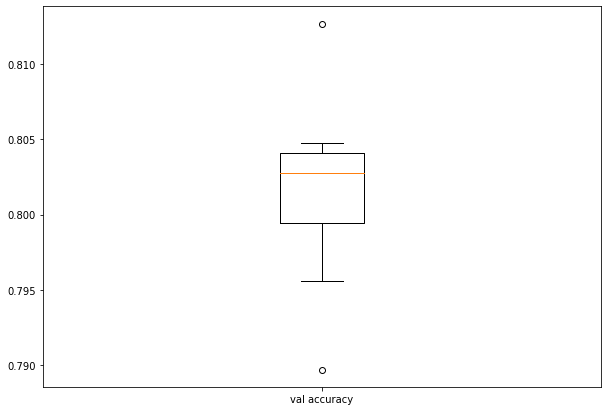

In [47]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(x=val_score,labels=("val accuracy",))

In [48]:
np.mean(val_score)

0.8015710054928185

In [55]:
gc = GaussianNB()
Cc = CategoricalNB()
cont_classifier = gc.fit(train_cont,y_train)
mod = Cc.fit(train_cat_encoded,y_train)

pred2 = cont_classifier.predict_log_proba(test_cont)
pred1 = mod.predict_log_proba(test_cat)

log_prior = mod.class_log_prior_
jlls = []
jlls.append(cont_classifier._joint_log_likelihood(test_cont))
jlls.append(mod._joint_log_likelihood(np.array(test_cat.astype(int))))

jlls = np.hstack([jlls])

jlls = jlls - log_prior
jll = jlls.sum(axis=0) + log_prior
fo = np.exp(jll)
sumso = np.sum(fo, axis = 1, keepdims = True) 
result = fo/sumso

y_test= np.argmax(result,axis=1)



In [58]:
pd.DataFrame(y_test).to_csv('pred NB.csv')